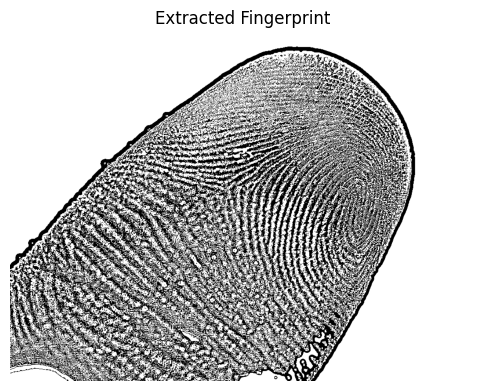

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('2927418551_f442e6b0f5_b.jpg')

# Convert to HSV color space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Define the lower and upper bounds for skin color in HSV
lower = np.array([0, 20, 70], dtype="uint8")
upper = np.array([20, 255, 255], dtype="uint8")

# Threshold the image to extract only the skin color pixels
mask = cv.inRange(hsv, lower, upper)

# Perform morphological transformations to remove noise
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)

# Apply Gaussian blur to smoothen edges
mask = cv.GaussianBlur(mask, (3, 3), 0)

# Extract the segmented finger
finger = cv.bitwise_and(img, img, mask=mask)

# Convert to grayscale
finger_gray = cv.cvtColor(finger, cv.COLOR_BGR2GRAY)

# # Enhance contrast using Histogram Equalization
finger_gray = cv.equalizeHist(finger_gray)

# Apply Unsharp Masking (Sharpening Kernel)
sharpen_kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])
sharpened = cv.filter2D(finger_gray, -1, sharpen_kernel)

# Apply adaptive thresholding to enhance fingerprint ridges
fingerprint = cv.adaptiveThreshold(
    sharpened, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 19,1
)

# Display the extracted fingerprint
plt.figure(figsize=(6, 6))
plt.imshow(fingerprint, cmap="gray")
plt.title("Extracted Fingerprint")
plt.axis("off")
plt.show()
